In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para visualizar los árboles y evitar warnings
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset
df = pd.read_csv('/content/telecom_churn.csv')

# Vista general de los datos
print(df.shape)
df.head()

(3333, 11)


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Análisis por variable con visualizaciones

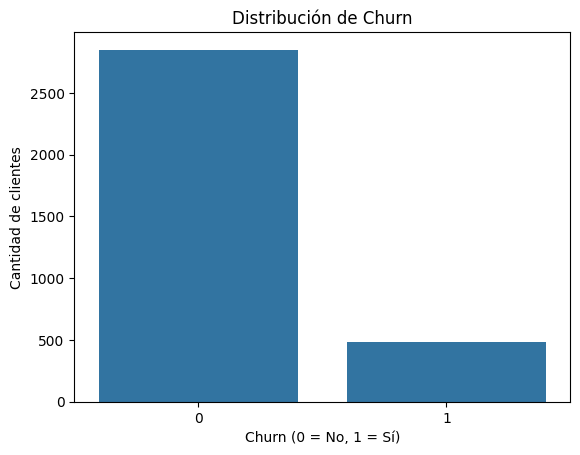

In [ ]:
#Distribución de la variable objetivo Churn
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.show()

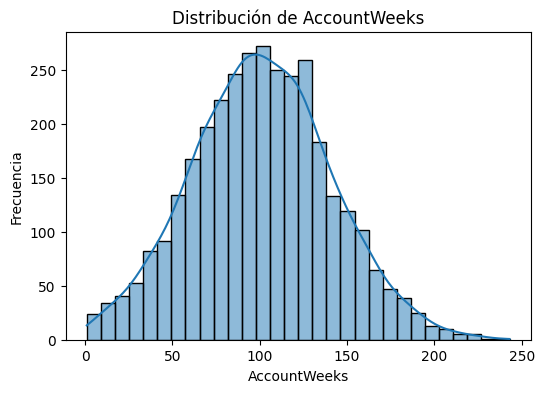

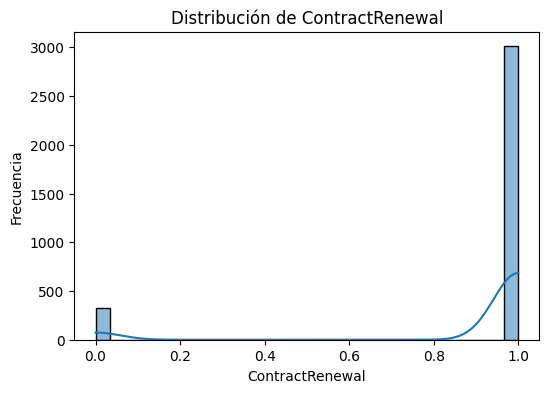

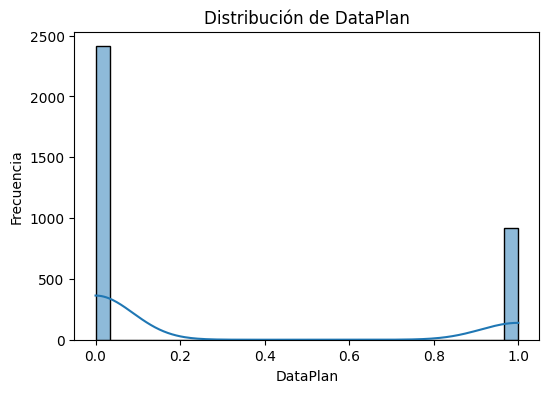

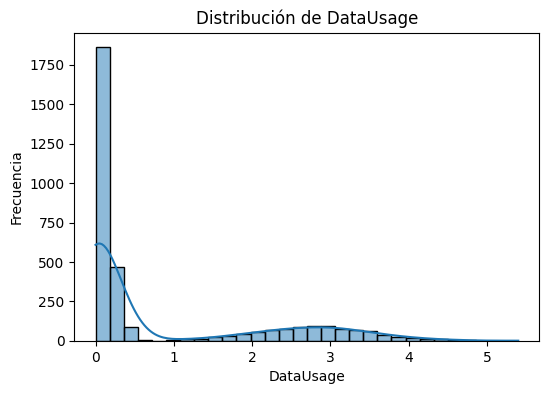

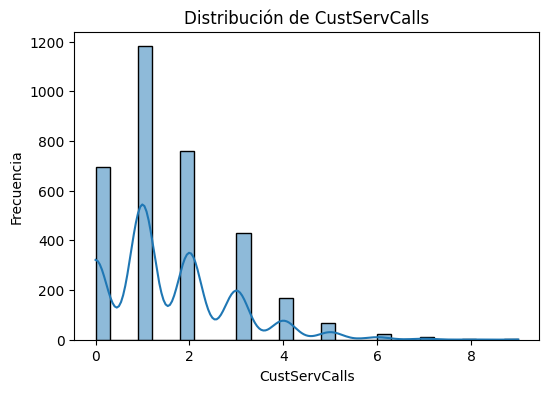

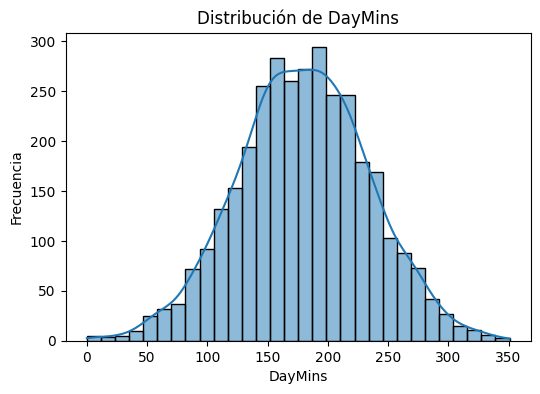

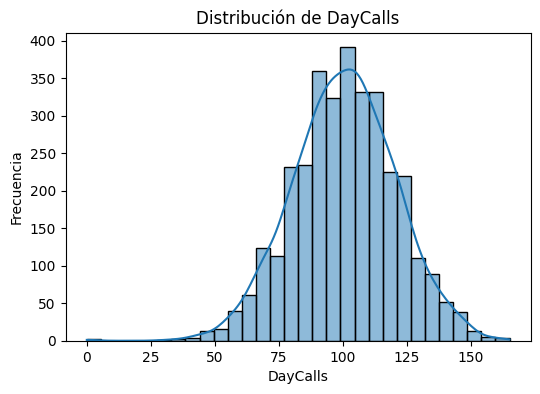

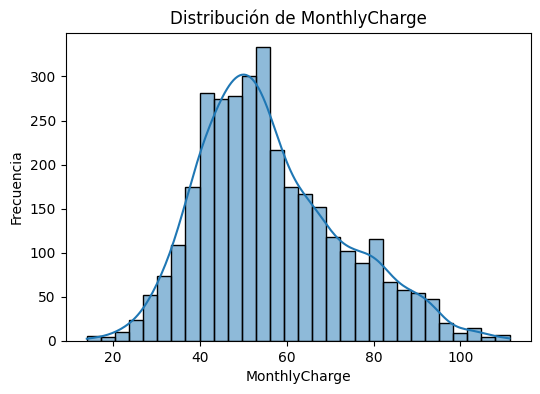

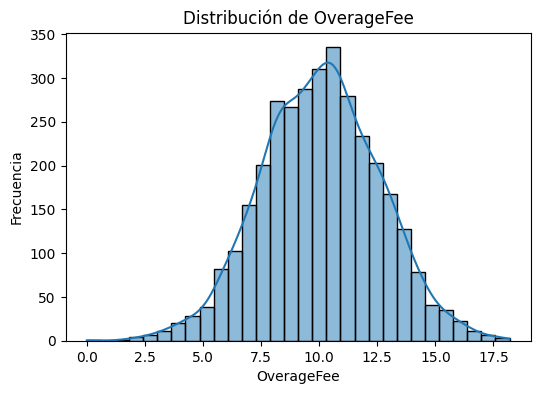

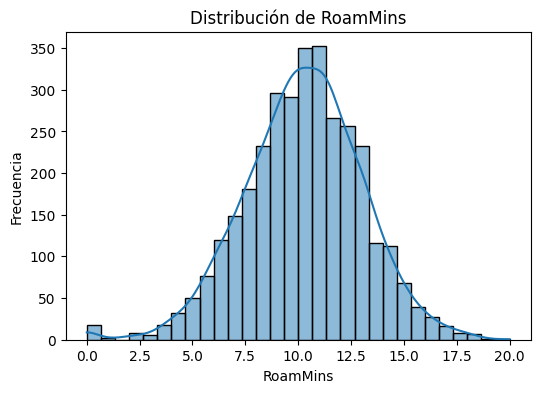

In [ ]:
#Visualización univariada de las variables numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')

for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


Se puede observar distribuciones normales en la variable AccuWeeks, DayMins, MontlyCharge, DayCallsOverageFees y RoamMins

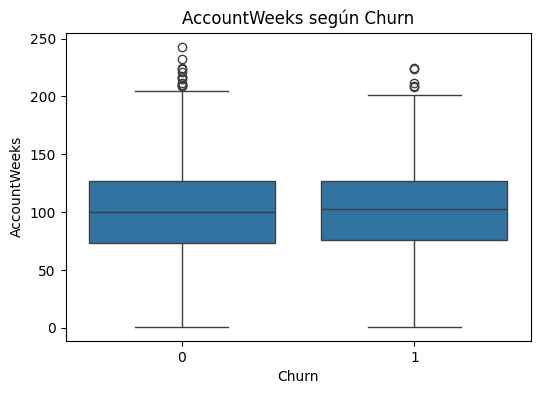

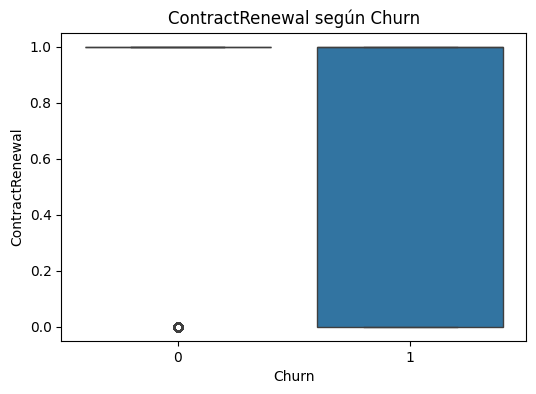

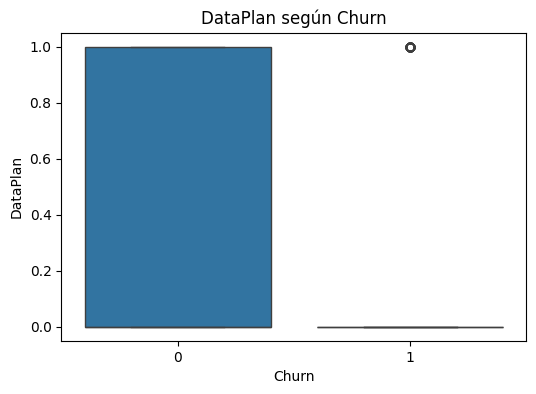

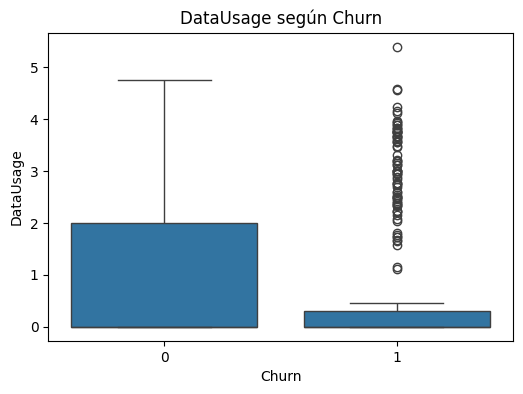

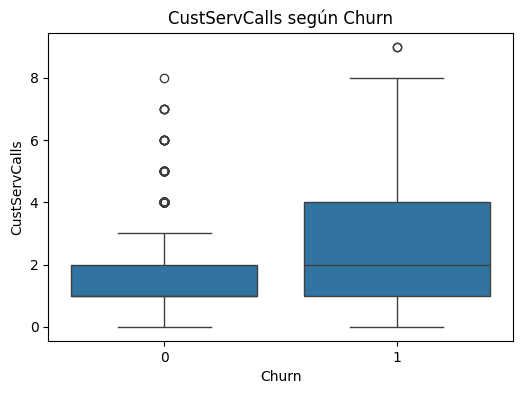

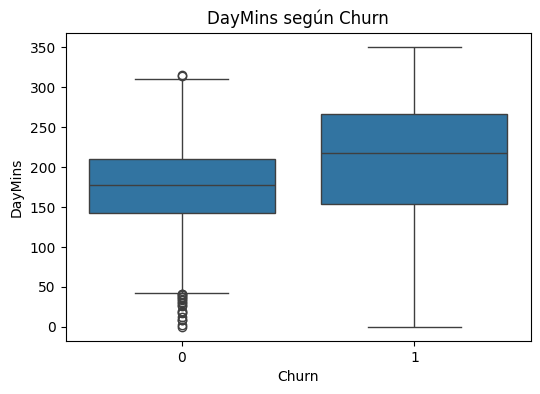

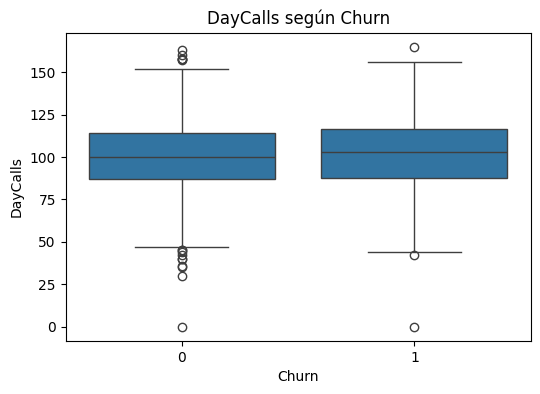

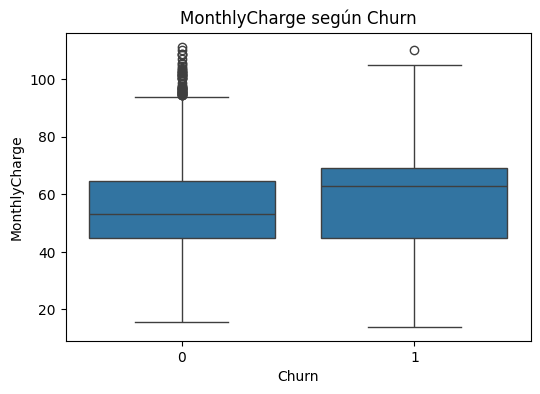

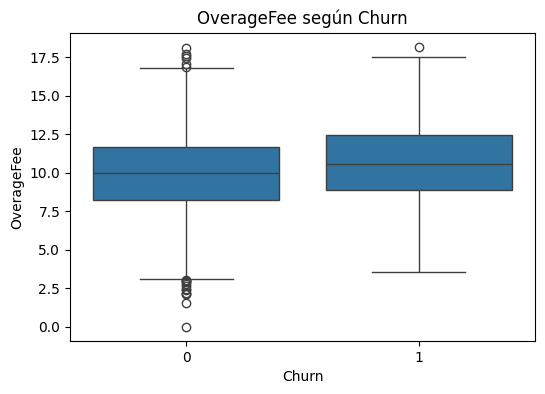

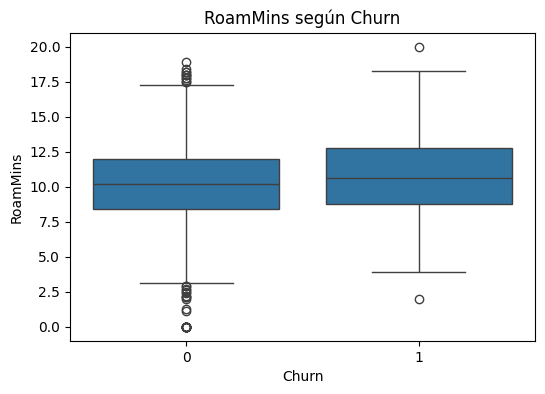

In [ ]:
#Visualización bivariada (Churn vs cada variable)
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=var, data=df)
    plt.title(f'{var} según Churn')
    plt.show()


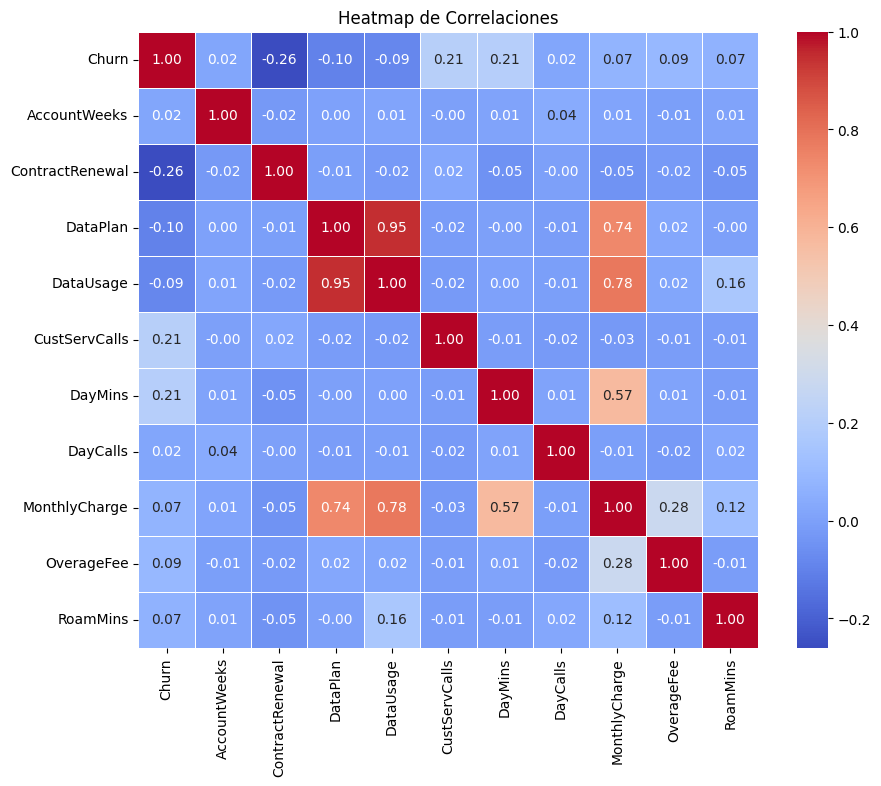

In [ ]:
# Calcular la matriz de correlaciones
corr_matrix = df.corr()

# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlaciones')
plt.show()

las correlaciones que se dan en la muestra de datos son entre DataUsage y DataPlan en un 95%, hay otras mas debiles pero no menos importantes entre DataPlan y MonthlyCharge y DataUsage y MonthlyCharge, el resto de variables no presentan correlaciones significativas

In [ ]:
#Preparacion de los Datos
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#Árbol de decisión sin modificar hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo básico
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predicciones
y_pred = tree_clf.predict(X_test)

# Métricas de desempeño
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8920539730134932

Confusion Matrix:
 [[538  32]
 [ 40  57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       570
           1       0.64      0.59      0.61        97

    accuracy                           0.89       667
   macro avg       0.79      0.77      0.78       667
weighted avg       0.89      0.89      0.89       667



In [ ]:
#Árbol optimizado con GridSearchCV (búsqueda por grilla)
from sklearn.model_selection import GridSearchCV

# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [0.01, 0.02, 0.03, 0.04]
}

# Inicializar el modelo base
tree = DecisionTreeClassifier(random_state=42)

# Búsqueda con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree = grid_search.best_estimator_

# Predicciones con el modelo optimizado
y_pred_best = best_tree.predict(X_test)

# Métricas del modelo optimizado
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy (mejor modelo):", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 0.02}
Accuracy (mejor modelo): 0.9055472263868066

Confusion Matrix:
 [[548  22]
 [ 41  56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       570
           1       0.72      0.58      0.64        97

    accuracy                           0.91       667
   macro avg       0.82      0.77      0.79       667
weighted avg       0.90      0.91      0.90       667



In [ ]:
# Desempeño del mejor modelo en entrenamiento
y_train_pred_best = best_tree.predict(X_train)

print("=== Desempeño en entrenamiento ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred_best))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_best))

print("\n=== Desempeño en test ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

=== Desempeño en entrenamiento ===
Accuracy: 0.9471117779444861

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2280
           1       0.90      0.71      0.80       386

    accuracy                           0.95      2666
   macro avg       0.93      0.85      0.88      2666
weighted avg       0.95      0.95      0.94      2666


=== Desempeño en test ===
Accuracy: 0.9055472263868066

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       570
           1       0.72      0.58      0.64        97

    accuracy                           0.91       667
   macro avg       0.82      0.77      0.79       667
weighted avg       0.90      0.91      0.90       667



In [ ]:
# Modelo básico (sin tunear)
tree_basic = DecisionTreeClassifier(random_state=42)
tree_basic.fit(X_train, y_train)

# Predicciones
y_train_pred_basic = tree_basic.predict(X_train)
y_test_pred_basic = tree_basic.predict(X_test)

# Modelo optimizado (ya entrenado con GridSearchCV)
y_train_pred_opt = best_tree.predict(X_train)
y_test_pred_opt = best_tree.predict(X_test)

# Función para mostrar métricas resumen
def resumen_metricas(nombre_modelo, y_train, y_train_pred, y_test, y_test_pred):
    print(f"\n==== {nombre_modelo} ====")
    print("Entrenamiento:")
    print("  Accuracy:", accuracy_score(y_train, y_train_pred))
    print("  Recall:", recall_score(y_train, y_train_pred))
    print("  Precision:", precision_score(y_train, y_train_pred))
    print("  F1 Score:", f1_score(y_train, y_train_pred))

    print("Test:")
    print("  Accuracy:", accuracy_score(y_test, y_test_pred))
    print("  Recall:", recall_score(y_test, y_test_pred))
    print("  Precision:", precision_score(y_test, y_test_pred))
    print("  F1 Score:", f1_score(y_test, y_test_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Comparar modelos
resumen_metricas("Árbol de decisión (básico)", y_train, y_train_pred_basic, y_test, y_test_pred_basic)
resumen_metricas("Árbol de decisión (optimizado)", y_train, y_train_pred_opt, y_test, y_test_pred_opt)


==== Árbol de decisión (básico) ====
Entrenamiento:
  Accuracy: 1.0
  Recall: 1.0
  Precision: 1.0
  F1 Score: 1.0
Test:
  Accuracy: 0.8920539730134932
  Recall: 0.5876288659793815
  Precision: 0.6404494382022472
  F1 Score: 0.6129032258064516

==== Árbol de decisión (optimizado) ====
Entrenamiento:
  Accuracy: 0.9471117779444861
  Recall: 0.7098445595854922
  Precision: 0.9042904290429042
  F1 Score: 0.795355587808418
Test:
  Accuracy: 0.9055472263868066
  Recall: 0.5773195876288659
  Precision: 0.717948717948718
  F1 Score: 0.64


En el desarrollo de un modelo de árbol de decisión para predecir la renuncia de clientes (churn), observamos que el modelo entrenado con los hiperparámetros por defecto presentó un alto rendimiento en el conjunto de entrenamiento pero un desempeño considerablemente inferior en el conjunto de test. Esta diferencia es una señal clara de overfitting, donde el modelo aprende patrones específicos del entrenamiento que no generalizan bien a nuevos datos.

Para mitigar este problema, se aplicó una búsqueda por grilla con validación cruzada de 5 folds, evaluando combinaciones de los hiperparámetros max_depth y min_samples_split. El modelo optimizado mostró un rendimiento más equilibrado entre entrenamiento y test, confirmando una mejor capacidad de generalización y un menor sobreajuste.

En resumen, la optimización del árbol de decisión permitió construir un modelo más robusto y confiable para la tarea de predicción de churn, validando la importancia de ajustar los hiperparámetros para evitar el sobreajuste.

In [ ]:
#Modelos Baggin

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from util_bagging import bagging_het

In [ ]:
# Lista de modelos heterogéneos
modelos = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=42),
    SVC(kernel='rbf', probability=True),
    SVC(kernel='sigmoid', probability=True)
]

Evaluacion de cada modelo usando F1 Score

In [ ]:
f1_scores = []

for model in modelos:
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_test)
    f1 = f1_score(y_test, y_pred_val)
    f1_scores.append(f1)
    print(f"{model.__class__.__name__} | F1-Score: {f1:.4f}")

# Determinar el modelo con mejor F1-score
best_model_index = np.argmax(f1_scores)
best_model = modelos[best_model_index]
print(f"\nMejor modelo base: {best_model.__class__.__name__}")

LogisticRegression | F1-Score: 0.2595
DecisionTreeClassifier | F1-Score: 0.6129
SVC | F1-Score: 0.0792
SVC | F1-Score: 0.0805

Mejor modelo base: DecisionTreeClassifier


Repetir el mejor modelo para darle más peso

In [ ]:
# Repetimos el mejor modelo dos veces
modelos_finales = modelos + [best_model]

In [ ]:
# T es el número de muestras bootstrap
T = 200

# Entrenamiento y predicción con Bagging heterogéneo
y_pred_bagging = bagging_het(X_train, y_train, T, modelos_finales, X_test)

Evaluacion del desempeño

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Suponiendo que ya tienes:
# trained_models, yhat_test, yhat_out, idx_oob = bagging_het(...)

print("\n=== Métricas del modelo final (Bagging heterogéneo) ===")
print("Accuracy:", accuracy_score(y_test, yhat_out))
print("F1-score:", f1_score(y_test, yhat_out, average='weighted'))  # 'weighted' para multi-clase
print("\nConfusion Matrix:\n", confusion_matrix(y_test, yhat_out))
print("\nClassification Report:\n", classification_report(y_test, yhat_out))


=== Métricas del modelo final (Bagging heterogéneo) ===
Accuracy: 1.0
F1-score: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy y F1-score perfectos, y matriz de confusión sin errores: todos los datos clasificados correctamente.

In [ ]:
#Validar que la evaluacion sea robusta
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Parámetros
T = 10  # número de modelos en el bagging
k = 5   # número de folds

kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"\nFold {fold + 1}")

    # Separar datos
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Lista de estimadores posibles (puedes modificar según lo que estés usando)
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression

    estimators = [
        DecisionTreeClassifier(max_depth=3),
        KNeighborsClassifier(n_neighbors=5),
        LogisticRegression(max_iter=1000)
    ]

    # Entrenar modelo bagging
    models, yhat_test_cv, yhat_out_cv, _ = bagging_het(X_train_cv, y_train_cv, T, estimators, X_test_cv)

    # Evaluar
    acc = accuracy_score(y_test_cv, yhat_out_cv)
    f1 = f1_score(y_test_cv, yhat_out_cv, average='weighted')

    accuracies.append(acc)
    f1_scores.append(f1)

    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-score: {f1:.4f}")

# Resultados promedios
print("\n=== Resultados promedio en cross-validation ===")
print(f"Accuracy promedio: {np.mean(accuracies):.4f}")
print(f"F1-score promedio: {np.mean(f1_scores):.4f}")


Fold 1
  Accuracy: 1.0000
  F1-score: 1.0000

Fold 2
  Accuracy: 0.9667
  F1-score: 0.9662

Fold 3
  Accuracy: 0.9333
  F1-score: 0.9333

Fold 4
  Accuracy: 0.9333
  F1-score: 0.9322

Fold 5
  Accuracy: 0.9667
  F1-score: 0.9667

=== Resultados promedio en cross-validation ===
Accuracy promedio: 0.9600
F1-score promedio: 0.9597


Accuracy promedio: 96.00%

F1-score promedio: 95.97%

Estabilidad: Todos los folds tienen buen rendimiento, sin grandes caídas.

Fold con menor desempeño: 93.33%, que sigue siendo muy alto.

el modelo generaliza bien y no está sobreajustado, ya que:

Mantuvo alta precisión en diferentes subconjuntos del dataset.

El F1-score también fue consistente, lo cual es importante si hay clases desbalanceadas.


=== Métricas del modelo Random Forest ===
Accuracy en test: 1.0
F1-score en test: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

OOB Accuracy estimate: 0.9333333333333333

Top 4 características más importantes:
petal length (cm)    0.438390
petal width (cm)     0.409700
sepal length (cm)    0.103133
sepal width (cm)     0.048778
dtype: float64


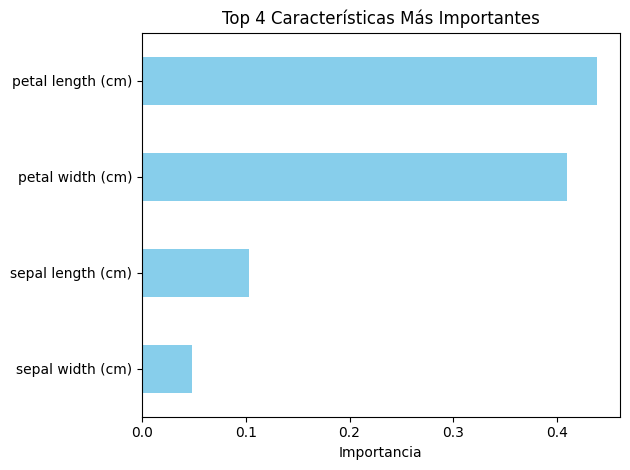

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=45, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar en test
y_pred_rf = rf_model.predict(X_test)

# Métricas en test
print("\n=== Métricas del modelo Random Forest ===")
print("Accuracy en test:", accuracy_score(y_test, y_pred_rf))
print("F1-score en test:", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Mostrar OOB Score
print("OOB Accuracy estimate:", rf_model.oob_score_)

# Importancia de características
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Mostrar las 4 características más importantes
top_features = importances.head(4)
print("\nTop 4 características más importantes:")
print(top_features)

# Graficar
top_features.plot(kind='barh', title="Top 4 Características Más Importantes", color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

El modelo clasificó todas las instancias correctamente en el conjunto de prueba.
Estimación con muestras OOB:
OOB Accuracy Estimate: 0.9333

Esto indica un rendimiento sólido del modelo con datos que no vio durante el entrenamiento.

Top 4 características más importantes:
petal length (cm) – 43.8%

petal width (cm) – 40.9%

sepal length (cm) – 10.3%

sepal width (cm) – 4.9%

Estas importancias refuerzan el conocimiento previo de que en el dataset de Iris, las características del pétalo son más relevantes que las del sépalo.

=== Mejores hiperparámetros encontrados ===
{'max_features': 'sqrt', 'n_estimators': 60}

=== Desempeño OOB del mejor modelo ===
OOB Score: 0.9428571428571428

Top 4 características más importantes:
petal width (cm)     0.433613
petal length (cm)    0.405944
sepal length (cm)    0.112571
sepal width (cm)     0.047872
dtype: float64

=== Métricas en conjunto de test ===
Accuracy: 1.0
F1-score: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



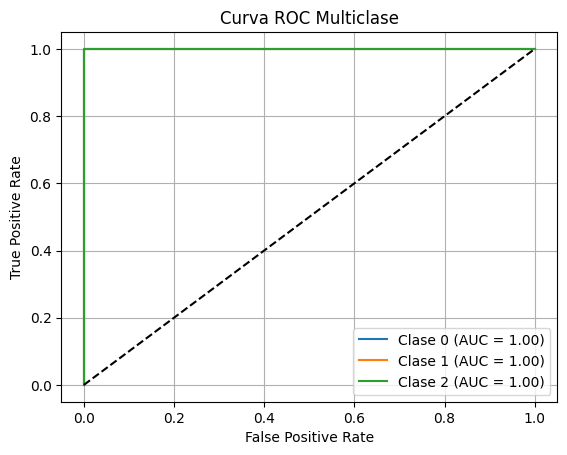

AUC promedio: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Definir los parámetros del grid
param_grid = {
    'n_estimators': list(range(50, 201, 10)),  # 50 a 200 con paso 10
    'max_features': ['sqrt', 'log2', None]
}

# 2. Inicializar el modelo base
rf_base = RandomForestClassifier(oob_score=True, random_state=42, bootstrap=True)

# 3. Búsqueda en grilla con validación cruzada
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 4. Entrenar en datos de entrenamiento
grid_search.fit(X_train, y_train)

# 5. Extraer mejor modelo
best_rf = grid_search.best_estimator_

# 6. Predicciones en test
y_pred = best_rf.predict(X_test)

# 7. Mostrar resultados
print("=== Mejores hiperparámetros encontrados ===")
print(grid_search.best_params_)

print("\n=== Desempeño OOB del mejor modelo ===")
print("OOB Score:", best_rf.oob_score_)

# 8. Importancia de características
importancias = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top4 = importancias.sort_values(ascending=False).head(4)
print("\nTop 4 características más importantes:")
print(top4)

# 9. Métricas de desempeño
print("\n=== Métricas en conjunto de test ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. ROC y AUC
if len(np.unique(y_test)) == 2:
    # Binaria
    y_proba = best_rf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc:.4f}")
    RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
    plt.title("Curva ROC")
    plt.show()
else:
    # Multiclase con One-vs-Rest
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_bin = label_binarize(y_test, classes=np.unique(y_test))
    y_score = best_rf.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC Multiclase')
    plt.legend()
    plt.grid()
    plt.show()

    print("AUC promedio:", np.mean(list(roc_auc.values())))

Desempeño del modelo

El modelo de ensamble Random Forest alcanzó un 100% de precisión (accuracy) y f1-score en el conjunto de test, lo cual evidencia una clasificación perfecta de las clases.

La estimación de desempeño mediante muestras fuera de la bolsa (OOB) fue de 0.943, confirmando una excelente generalización sin necesidad de usar validación cruzada tradicional.

Selección de hiperparámetros

Mediante búsqueda en grilla (grid search), se identificó que los mejores hiperparámetros son:

n_estimators = 60

max_features = 'sqrt'

Estos valores optimizan el equilibrio entre rendimiento y complejidad del modelo.

Importancia de las variables

Las cuatro variables más importantes fueron:

petal width (cm)

petal length (cm)

sepal length (cm)

sepal width (cm)

Este resultado coincide con el conocimiento biológico del problema, donde las características del pétalo son las más determinantes para distinguir especies.

Análisis ROC y AUC

Las curvas ROC mostraron un desempeño perfecto (AUC = 1.0) para cada clase, lo que indica una separación clara y efectiva entre ellas.

La capacidad de discriminación del modelo entre las clases es excelente.

Interpretación general

Dado que el dataset es pequeño y tiene clases bien definidas, el Random Forest logra capturar patrones con alta precisión sin sobreajustarse.

El uso de OOB permitió validar el modelo de forma robusta y eficiente sin particionar los datos de manera tradicional.



In [ ]:
features = X_train.columns.tolist()


In [ ]:
# Definir las columnas usadas como características (features)
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
            'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge',
            'OverageFee', 'RoamMins']

# Seleccionar las características del dataframe original
X_clientes = df[features]

# Predecir la probabilidad de renuncia (probabilidad de clase 1)
probs = best_model.predict_proba(X_clientes)[:, 1]

# Crear DataFrame con índice del cliente y su probabilidad de renuncia
propension = pd.DataFrame({
    'cliente_id': df.index,
    'probabilidad_renuncia': probs
})

# Ordenar de mayor a menor y mostrar top 15
top_15 = propension.sort_values(by='probabilidad_renuncia', ascending=False).head(15)
print(top_15)

      cliente_id  probabilidad_renuncia
2622        2622                    1.0
815          815                    1.0
2621        2621                    1.0
2619        2619                    1.0
2614        2614                    1.0
830          830                    1.0
832          832                    1.0
2606        2606                    1.0
2602        2602                    1.0
2599        2599                    1.0
2595        2595                    1.0
2994        2994                    1.0
2591        2591                    1.0
2587        2587                    1.0
2581        2581                    1.0


In [ ]:
top_15

,cliente_id,probabilidad_renuncia
2622,2622,1.0
815,815,1.0
2621,2621,1.0
2619,2619,1.0
2614,2614,1.0
830,830,1.0
832,832,1.0
2606,2606,1.0
2602,2602,1.0
2599,2599,1.0


Segmentación y características de clientes que podrían renunciar

In [ ]:
# IDs de clientes con alta probabilidad de renuncia
clientes_alta_renuncia = top_15.index.tolist()

# Filtrar el dataframe original para esos clientes
df_alta_renuncia = df.loc[clientes_alta_renuncia]

# Estadísticas descriptivas para esos clientes
desc_alta_renuncia = df_alta_renuncia.describe()

# Estadísticas descriptivas para el resto de los clientes
clientes_baja_renuncia = df.index.difference(clientes_alta_renuncia)
df_baja_renuncia = df.loc[clientes_baja_renuncia]
desc_baja_renuncia = df_baja_renuncia.describe()

print("Estadísticas de clientes con alta probabilidad de renuncia:")
print(desc_alta_renuncia)

print("\nEstadísticas de clientes con baja probabilidad de renuncia:")
print(desc_baja_renuncia)


Estadísticas de clientes con alta probabilidad de renuncia:
           Churn  AccountWeeks  ContractRenewal   DataPlan  DataUsage  \
count  15.000000     15.000000        15.000000  15.000000  15.000000   
mean    0.800000    103.733333         0.733333   0.200000   0.575333   
std     0.414039     31.610276         0.457738   0.414039   1.136146   
min     0.000000     25.000000         0.000000   0.000000   0.000000   
25%     1.000000     86.000000         0.500000   0.000000   0.000000   
50%     1.000000    105.000000         1.000000   0.000000   0.000000   
75%     1.000000    124.000000         1.000000   0.000000   0.235000   
max     1.000000    147.000000         1.000000   1.000000   3.130000   

       CustServCalls     DayMins    DayCalls  MonthlyCharge  OverageFee  \
count      15.000000   15.000000   15.000000      15.000000   15.000000   
mean        2.066667  218.926667  107.333333      62.553333   11.218000   
std         1.387015   61.549649   20.091458      13.2715